## Working with Time Series Data in Python

#### Lags, changes and returns for stock price series

Pushkar Sheth

https://ph.sheth.cc

19 August 2019


#### Basic Time Series Calculations

* Typical Time series manipulations include:
    * Shift or lag values back or forward in time
    * Get the difference in value for a given time period
    * Compute the percentage change over any number of periods
* pandas build-in methods rely on pd.DateTimeIndex

#### Getting GOOG stock prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
google = pd.read_csv('datasets/stock_data/google.csv', parse_dates=['Date'], index_col='Date') 

# Let pd.read_csv() do the parsing for you!

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
Close    756 non-null float64
dtypes: float64(1)
memory usage: 17.1 KB


In [4]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


#### .shift(): Moving data between past and future

In [5]:
google['shifted'] = google.Close.shift() # default: periods = 1 (1 period into future)

In [6]:
google.head(5)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [7]:
google['lagged'] = google.Close.shift(periods = -1)

In [8]:
google[['Close', 'lagged', 'shifted']].tail()

,Close,lagged,shifted
Date,,,
2016-12-26,NaN,791.55,NaN
2016-12-27,791.55,785.05,NaN
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


#### Calculate one-period percent change
### $\frac{x_{t}}{x_{t-1}}$

In [9]:
google['change'] = google.Close.div(google.shifted) 

In [10]:
google[['Close', 'shifted', 'change']].head()

,Close,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,0.992716
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,NaN
2014-01-06,558.10,NaN,NaN


In [11]:
google['return'] = google.change.sub(1).mul(100)

In [12]:
google[['Close', 'shifted', 'change', 'return']].head()

,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN
2014-01-05,NaN,NaN,NaN,NaN
2014-01-06,558.10,NaN,NaN,NaN


#### .diff() and .pct_change(): built-in time-series change

### $x_{t} - x_{t-1}$

In [13]:
google['diff'] = google.Close.diff()

In [14]:
google[['Close', 'diff']].head()

,Close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


In [15]:
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close', 'return', 'pct_change']].head()

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-04,NaN,NaN,0.000000
2014-01-05,NaN,NaN,0.000000
2014-01-06,558.10,NaN,1.114231


#### Looking ahead: Get multi-period returns

In [16]:
google['return_3d'] = google.Close.pct_change(3).mul(100) # Percentage change for two periods, 3 trading days apart
google[['Close', 'return_3d']].head()

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231


Exercise:

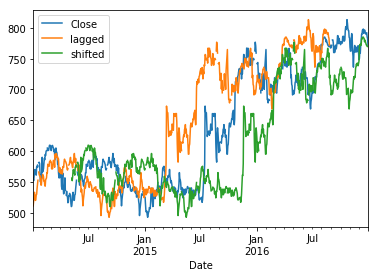

In [17]:
google = pd.read_csv('datasets/stock_data/google.csv', parse_dates=['Date'], index_col='Date') 

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods = -90)
google['shifted'] = google.Close.shift(periods = 90)

# Plot the google price series
google.plot()
plt.show()



Exercise:

In [18]:
yahoo = pd.read_csv('datasets/stock_data/yahoo.csv', parse_dates=['date'], index_col='date') 


In [19]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods = 30)

In [20]:
# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

In [21]:
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods = 30)

In [22]:
# Inspect the last five rows of price
print(yahoo.tail())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64


In [23]:
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.diff_30.sub(yahoo.change_30).value_counts())

0.0    703
dtype: int64


Exercise:

In [24]:
google = pd.read_csv('datasets/stock_data/google.csv', parse_dates=['Date'], index_col='Date') 


In [25]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

In [26]:
# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

In [27]:
# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

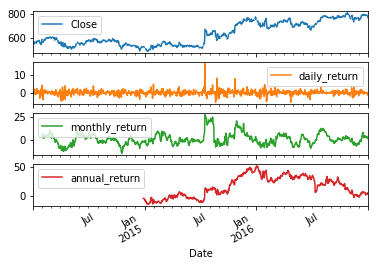

In [28]:
# Plot the result
google.plot(subplots = True)
plt.show()

#### EOC